In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
df = pd.read_csv("Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.shape

(568454, 10)

In [4]:
df = df[['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
         'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']]

In [5]:
df.drop_duplicates(subset=['Text','Time','ProfileName','UserId'], inplace=True)
df.dropna(inplace=True)

In [6]:
df["Time"]=pd.to_numeric(df["Time"], errors='coerce')
df.dropna(subset=['Time'], inplace=True)
df["Time"] = pd.to_datetime(df["Time"], unit='s')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393914 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      393914 non-null  int64         
 1   ProductId               393914 non-null  object        
 2   UserId                  393914 non-null  object        
 3   ProfileName             393914 non-null  object        
 4   HelpfulnessNumerator    393914 non-null  int64         
 5   HelpfulnessDenominator  393914 non-null  int64         
 6   Score                   393914 non-null  int64         
 7   Time                    393914 non-null  datetime64[ns]
 8   Summary                 393914 non-null  object        
 9   Text                    393914 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 33.1+ MB


C:\Users\subra\AppData\Local\Temp\ipykernel_6608\247065548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score', data=df, palette='viridis')


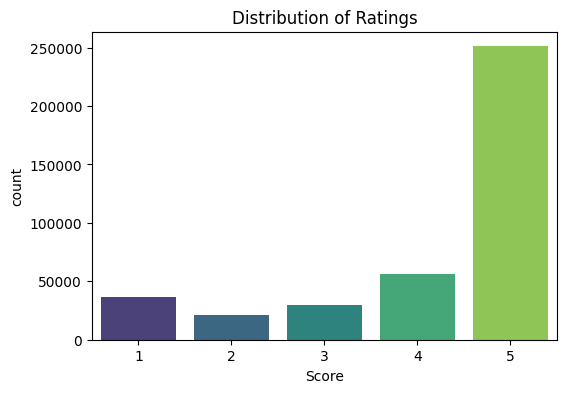

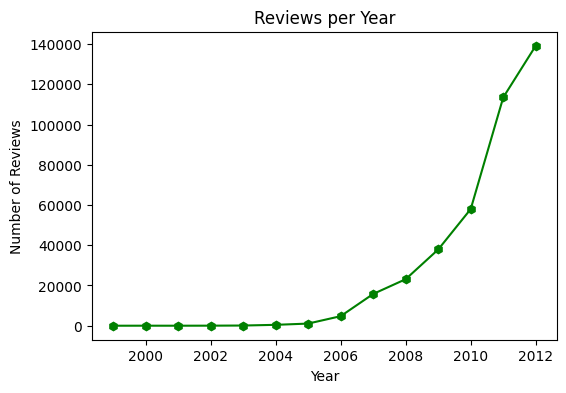

In [8]:
#Rating distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Score', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.show()
#Revievs per year
df['Year'] = df['Time'].dt.year
reviews_per_year = df.groupby('Year').size()
reviews_per_year.plot(kind='line', figsize=(6,4), marker = 'h',color='g',title='Reviews per Year') #trend plot
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\subra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

C:\Users\subra\AppData\Local\Temp\ipykernel_6608\445888418.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


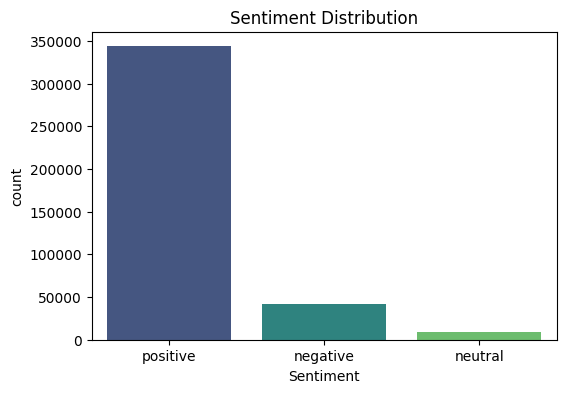

In [10]:
vader = SentimentIntensityAnalyzer()
def sentiment_analysis(text):
    score = vader.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['Text'].apply(sentiment_analysis)
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

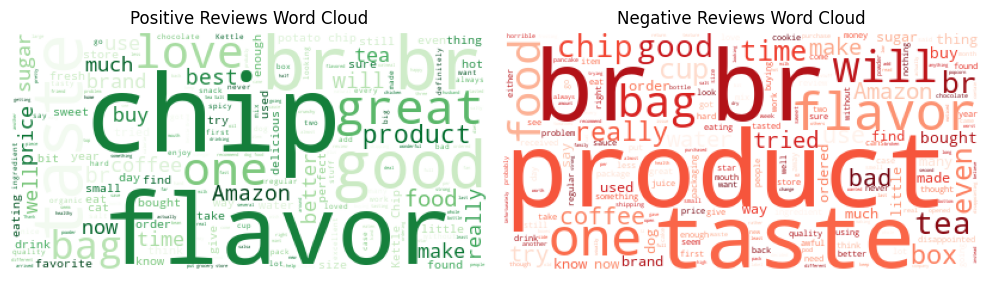

In [11]:
positive_text = ' '.join(df[df['Sentiment'] == 'positive']['Text'][:500])
negetive_text = ' '.join(df[df['Sentiment'] == 'negative']['Text'][:500])

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(background_color='white', colormap='Greens').generate(positive_text))
plt.axis('off')
plt.title('Positive Reviews Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(background_color='white', colormap='Reds').generate(negetive_text))
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.tight_layout()
plt.show()

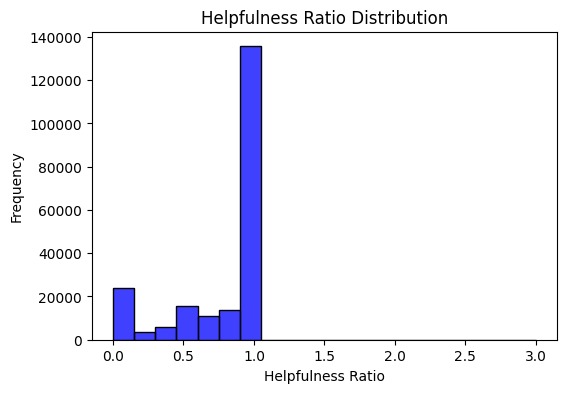

In [12]:
#Helpfulness ratio
df['HelpfulnessNumerator'] = pd.to_numeric(df['HelpfulnessNumerator'], errors='coerce')
df.dropna(subset=['HelpfulnessNumerator'], inplace=True)
df['HelpfulnessRatio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'].replace(0, np.nan)

plt.figure(figsize=(6,4))
sns.histplot(df['HelpfulnessRatio'], bins=20, color='blue')
plt.title('Helpfulness Ratio Distribution')
plt.xlabel('Helpfulness Ratio') 
plt.ylabel('Frequency')
plt.show()

In [13]:
from collections import Counter
import re

def get_top_words(texts,n=10):
    words=" ".join(texts).lower()
    words = re.findall(r'\b\w+\b', words)
    return Counter(words).most_common(n)

print("Top 10 words in positive reviews:")
top_words = get_top_words(df[df['Sentiment'] == 'positive']['Text'], 10)
for word, count in top_words:
    print(f"{word}: {count}")
print("Top 10 words in negative reviews:")
top_words_negative = get_top_words(df[df['Sentiment'] == 'negative']['Text'], 10)
for word, count in top_words_negative:
    print(f"{word}: {count}")

Top 10 words in positive reviews:
the: 1137837
i: 1031806
and: 801279
a: 773078
it: 681049
to: 624736
of: 488420
is: 459274
this: 420469
br: 400766
Top 10 words in negative reviews:
the: 143372
i: 125606
and: 79865
it: 74585
a: 73792
to: 71659
of: 56950
this: 49529
is: 45644
br: 41421


C:\Users\subra\AppData\Local\Temp\ipykernel_6608\2739344904.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='bigram', data=bigram_df, palette='viridis')


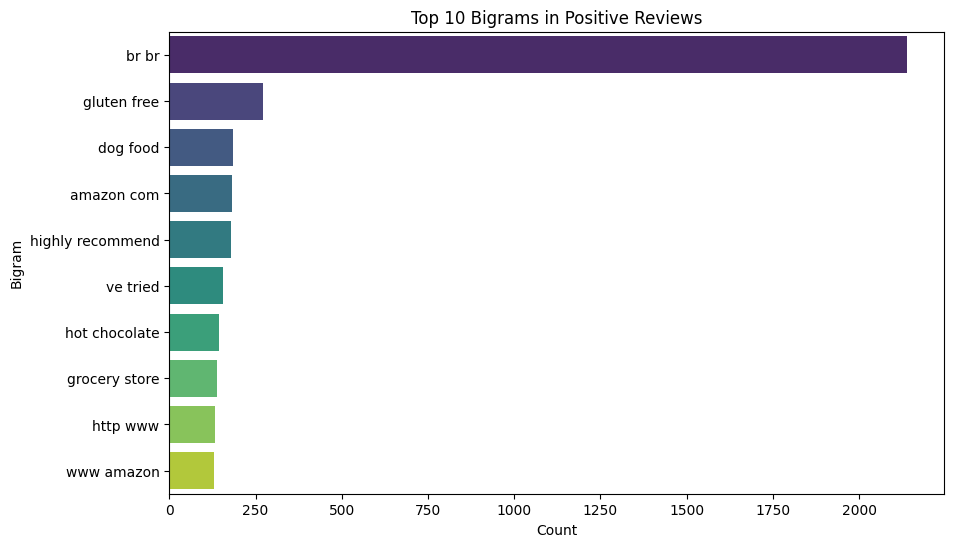

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorier = CountVectorizer(ngram_range=(2,2),stop_words='english')
X = vectorier.fit_transform(df[df['Sentiment'] == 'positive']['Text'][:5000])
bigrams = vectorier.get_feature_names_out()
counts = X.sum(axis=0).A1
bigram_df = pd.DataFrame({'bigram': bigrams, 'count': counts})
bigram_df = bigram_df.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='bigram', data=bigram_df, palette='viridis')
plt.title('Top 10 Bigrams in Positive Reviews')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

C:\Users\subra\AppData\Local\Temp\ipykernel_6608\3095107183.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='magma')


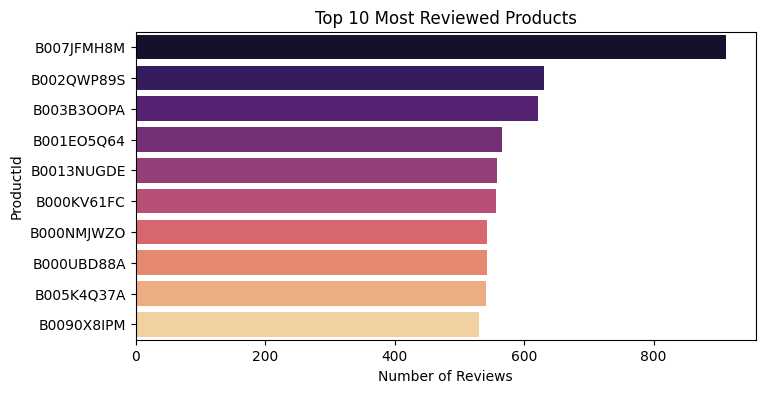

In [15]:
top_products = df['ProductId'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Number of Reviews")
plt.show()

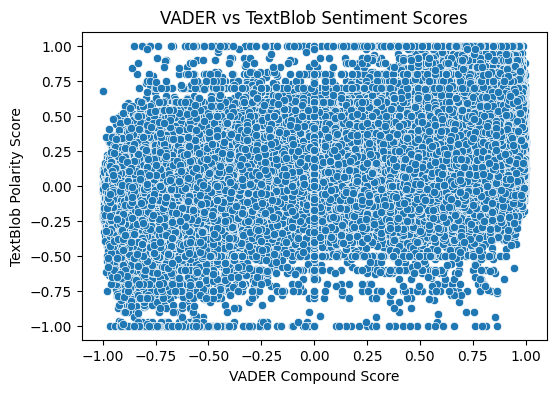

In [18]:
from textblob import TextBlob

def textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity 

df['textblob_score'] = df['Text'].apply(textblob_sentiment)

# Add VADER compound score column if not already present
if 'vader_compound' not in df.columns:
    df['vader_compound'] = df['Text'].apply(lambda x: vader.polarity_scores(x)['compound'])

plt.figure(figsize=(6,4))
sns.scatterplot(x='vader_compound', y='textblob_score', data=df)
plt.title('VADER vs TextBlob Sentiment Scores')
plt.xlabel('VADER Compound Score')
plt.ylabel('TextBlob Polarity Score')
plt.show()

In [19]:
%pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

while True:
    user_input = input("Enter text (or type 'exit'): ")
    if user_input.lower() == 'exit':
        break
    score = analyzer.polarity_scores(user_input)
    if score['compound'] > 0.05:
        print("🙂 Positive Sentiment")
    elif score['compound'] < -0.05:
        print("☹ Negative Sentiment")
    else:
        print("😐 Neutral Sentiment")


🙂 Positive Sentiment
☹ Negative Sentiment
